# RGB2Hue

In [8]:
FIXED = 4

## Fixed point division

In [9]:
def div(c1, c2, diff):
    return (((c1-c2)<<(FIXED+FIXED))//(diff<<FIXED))

## Find Hue and Staturation from RGB

In [10]:
def rgb2hue(r, g, b):
  cmax = max(r, g, b)
  cmin = min(r, g, b)
  diff = cmax - cmin

  if diff == 0:
    return 0,0
  else:
    s = (((diff<<(FIXED+FIXED)) // (cmax<<FIXED)) * (100<<FIXED)) >> FIXED
    if cmax == r:
      if g >= b:
        return (div(g, b, diff)  * (60<<FIXED)) >> FIXED, s
      else:
        return (360<<FIXED) - ((div(b, g, diff) * (60<<FIXED)) >> FIXED), s
    if cmax == g:
      if b >= r:
        return (((2<<FIXED) + div(b, r, diff)) * (60<<FIXED)) >> FIXED, s
      else:
        return (((2<<FIXED) - div(r, b, diff)) * (60<<FIXED)) >> FIXED, s
    if cmax == b: 
      if r >= g:
        return (((4<<FIXED) + div(r, g, diff)) * (60<<FIXED)) >> FIXED, s
      else:
        return (((4<<FIXED) - div(g, r, diff)) * (60<<FIXED)) >> FIXED, s

### Test `rgb2hue()`

In [11]:
hue, s = rgb2hue(123,234,72)
print("hue: ", hue>>FIXED)
print("staturation: ", s>>FIXED)

hue:  101
staturation:  68


# Image processing

In [12]:
from numpy import array, append
from PIL import Image

# resize image to 640x480 
# im_org = Image.open("image.jpg").resize((640, 480))
# im_org.save("image_sd.jpg")

im = Image.open("image_avg.jpg")
im_arr = array(im)

In [13]:
with open("hue.txt", "w") as file:
    for r in im_arr:
        for p in r:
            hue, s = rgb2hue(*p)
            hue >>= FIXED
            file.write("{:0>3d} ".format(hue))
        file.write("\n")

In [14]:
with open("sat.txt", "w") as file:
    for r in im_arr:
        for p in r:
            hue, s = rgb2hue(*p)
            s >>= FIXED
            file.write("{:0>3d} ".format(s))
        file.write("\n")

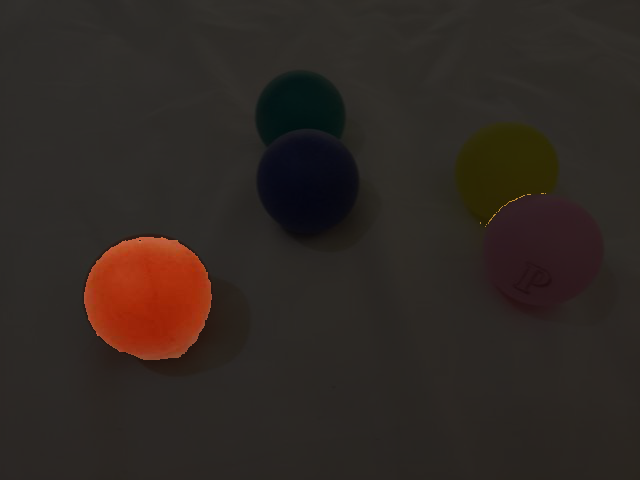

In [15]:
im_highlight_arr = array(im)

r, c , p = im_highlight_arr.shape

for i in range(0,r):
    for j in range(0, c):
        hue, s = rgb2hue(*im_highlight_arr[i,j])
        hue >>= FIXED
        s >>= FIXED
        if not ((hue < 40 or hue > 355) and s > 60): 
            im_highlight_arr[i, j] =  im_highlight_arr[i, j] >> 2

# im_highlight_arr = [ [ p >> 2 if hue < 355 and hue > 20 else p for p in r ] for r in im_arr ]

Image.fromarray(im_highlight_arr)